<a href="https://colab.research.google.com/github/mrwbeal/MendotaRS/blob/main/RSandWQLesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Water Quality and Remote Sensing lesson plan ideas:**


Take pictures of water with different chlorophyll-a content (could expand to sechi, tss, phycocyanin, etc.)



* Evaluate images with a simple code in google colab that looks at RGB layers. Students take a picture with a phone, transfer to a computer as a jpeg and then read into a simple python script.

* Students can then try to determine which bottle has the largest chlorophyll-a content based on green band readings, etc.

* This activity can be paired with sonde-measurements of each sample to develop a statistical model for high-school level students.

* The activity is paired with a short lecture on satellite remote sensing, water quality, and algae blooms.

**Part 1: Read in image data and investigate image bands**
---

Goal: Read in and visualize photos of water quality samples
---
---
**Background**

* We have four water quality samples that have been analyzed for chlorophyll-a concentrations, measured in micrograms of chlorophyll-a per liter of water (µg/l). Chlorophyll-a is a pigment that is abundant in plant life. Chlorophyll-a is the pigment that gives plants their green color. Measurements of chlorohyll-a concentration are often used to estimate the amount of algae in a water sample.

* We see objects with high chlorophyll-a content as green because chlorophyll-a **reflects** light wavelengths in the green range of the color spectrum. This means that water samples with higher chlorophyll-a concentrations often appear more green.

* We would like to test if there's a relationship between the color of a water sample and its chlorophyll-a concentration. We'll start by visualizing our water samples.


---
**Instructions**

1. Take an overhead picture of each water sample. Transfer the photos to you computer. Now save them as sample1.jpeg, sample2.jpg, sample3.jpg, and sample4.jpg

2. Run the below code. When prompted, select "choose files" to browse and upload each .jpg file to Google Colab




In [ ]:
#File upload
from google.colab import files
uploaded = files.upload()

Run the below code to install the necessary packages

In [ ]:
!pip install gdal
!pip install rasterio
!pip install netcdf4
!pip install geopandas
!pip install geojson

3. Run the code below to plot out the images of each of the samples.

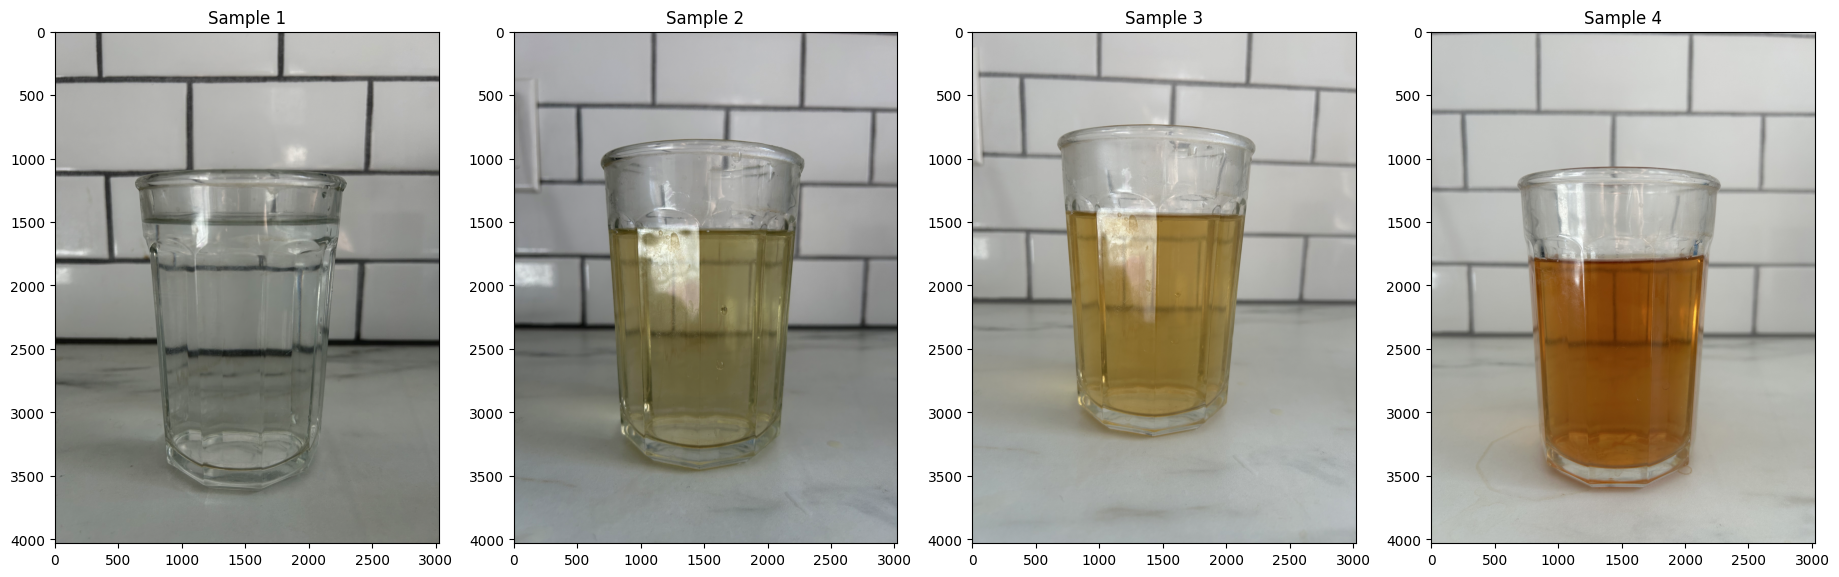

In [ ]:
# Python program to read
# image using matplotlib

# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# Read Images
img1 = mpimg.imread('/content/sample1.jpg')
img1 = (img1 - np.min(img1)) / (np.max(img1) - np.min(img1))
img2 = mpimg.imread('/content/sample2.jpg')
img2 = (img2 - np.min(img2)) / (np.max(img2) - np.min(img2))
img3 = mpimg.imread('/content/sample3.jpg')
img3 = (img3 - np.min(img3)) / (np.max(img3) - np.min(img3))
img4 = mpimg.imread('/content/sample4.jpg')
img4 = (img4 - np.min(img4)) / (np.max(img4) - np.min(img4))

# Output Images
fig, ax = plt.subplots(1,4)
fig.set_size_inches(18.5, 10.5, forward=True)
ax[0].imshow(img1)
ax[0].set_title("Sample 1")
ax[1].imshow(img2)
ax[1].set_title("Sample 2")
ax[2].imshow(img3)
ax[2].set_title("Sample 3")
ax[3].imshow(img4)
ax[3].set_title("Sample 4")
fig.tight_layout()
plt.show()


Now that we've read our images into Google Colab, we can investigate the reflectance data that create each image.


---
**Background**

* Simple cameras take photos using three "bands": Red, Green, and Blue. Images are created by varying the reflectance values of each of these colors.
* In the code above we normalized our image data so reflectance values range from 0 to 1.

---
**Instructions**
* Run the below code to plot each band from the sample 4 image

---

*Questions*:
  
  * Which band do you think shows the highest reflectance values in the water sample? Which band has the lowest?





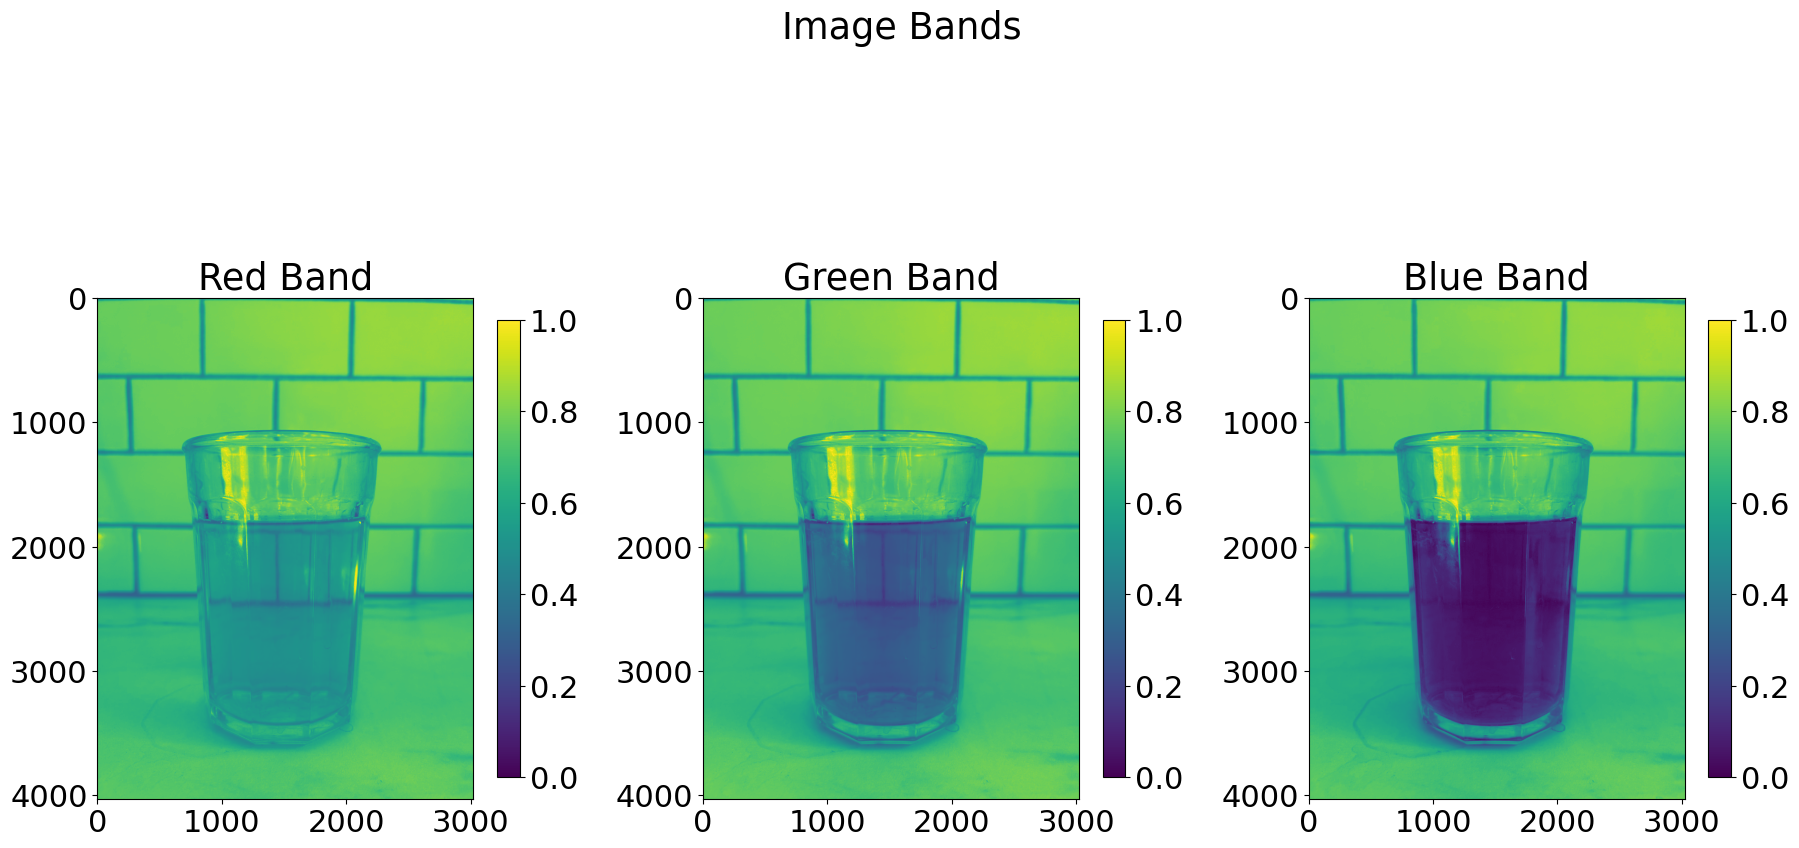

In [ ]:
plt.rcParams.update({'font.size': 22})


# find minimum of minima & maximum of maxima
minmin = np.min(img4)
maxmax = np.max(img4)

fig, ax = plt.subplots(1,3)
fig.set_size_inches(18.5, 10.5, forward=True)
i1=ax[0].imshow(img4[:,:,0], vmin=minmin, vmax=maxmax)
ax[0].set_title("Red Band")
i2=ax[1].imshow(img4[:,:,1], vmin=minmin, vmax=maxmax)
ax[1].set_title("Green Band")
i3=ax[2].imshow(img4[:,:,2], vmin=minmin, vmax=maxmax)
ax[2].set_title("Blue Band")

fig.suptitle("Image Bands")
fig.colorbar(i1, shrink=0.5)
fig.colorbar(i2, shrink=0.5)
fig.colorbar(i3, shrink=0.5)
fig.tight_layout()
plt.show()

Goal: Investigate differences in the images by plotting reflectance data as histograms.
---
---
**Background**

* A **histogram** is similar to a bar graph. A histogram is a type of graph that groups numbers into several ranges (bins). The height of each bar shows how many times a number falls into that range. A histogram allows us to see the distribution of the data.


* In this case, we will plot histograms that show how many image pixels fall into each band reflectance category.

---



*Questions:*

* What similarities are there among all the histogram plots (for all samples)?

* Which samples have similar histograms for each band (Red, Green, and Blue)? Why?





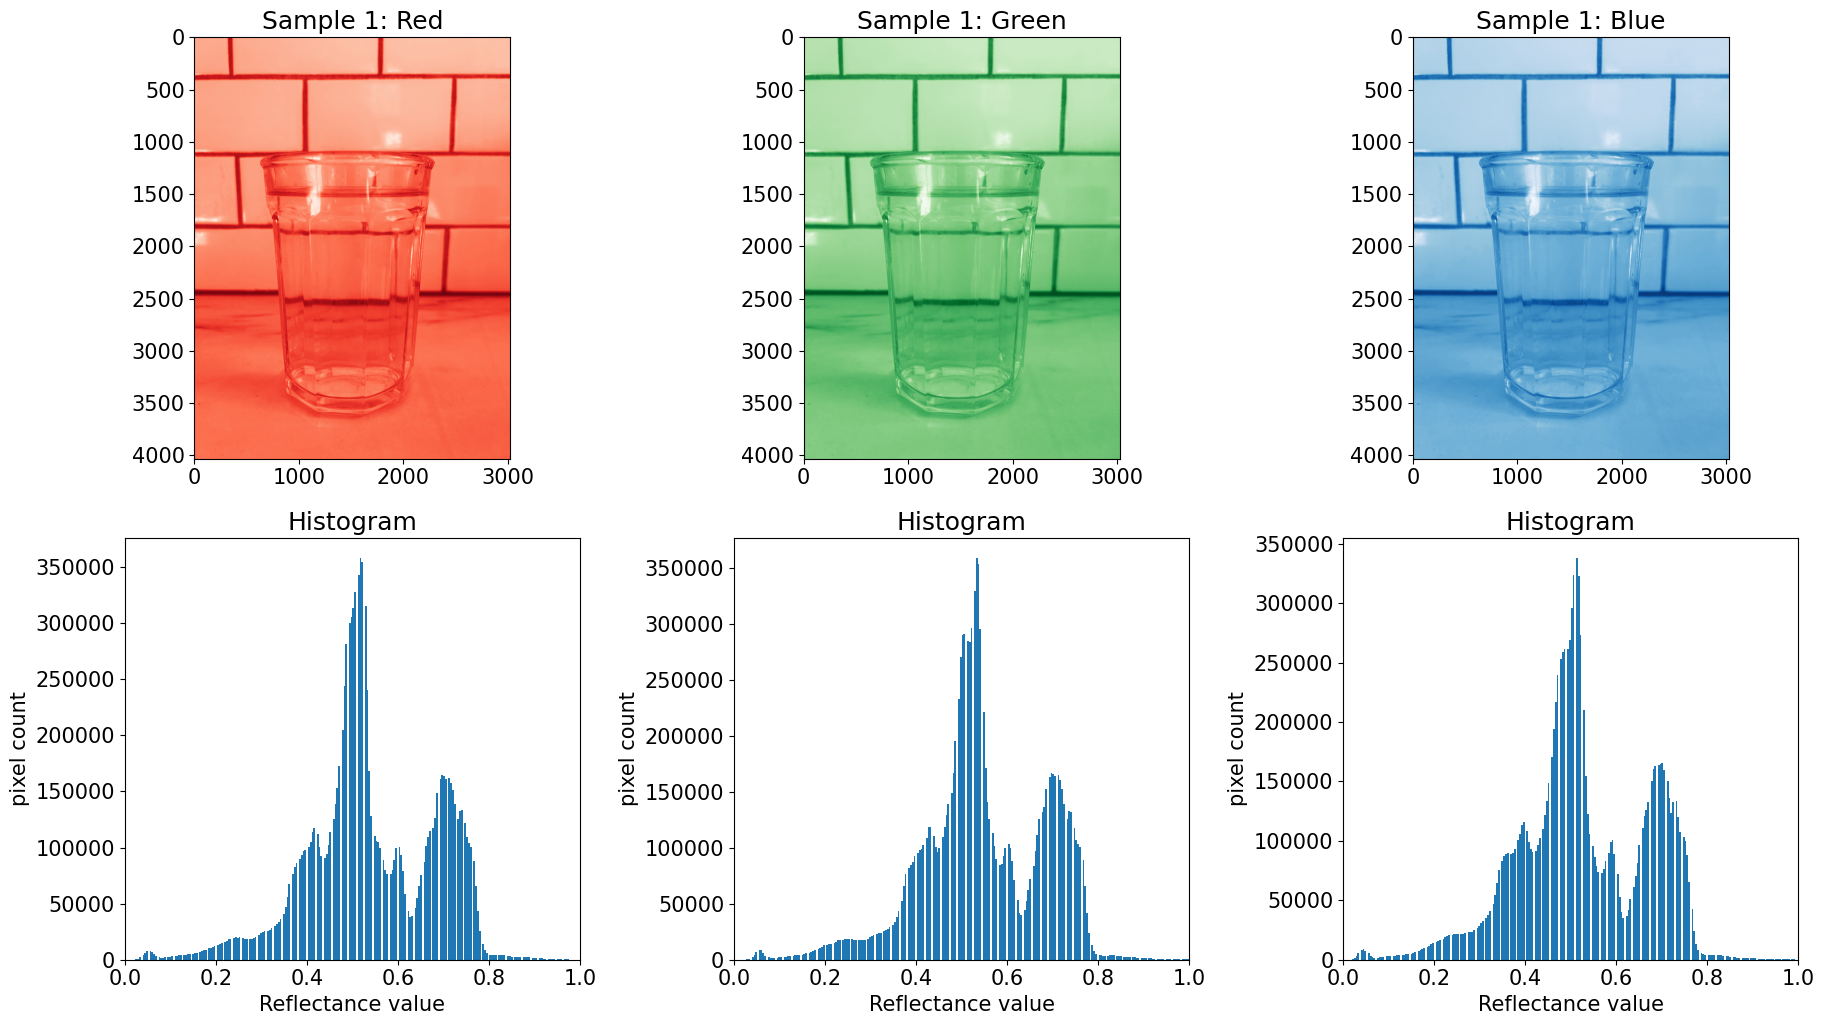

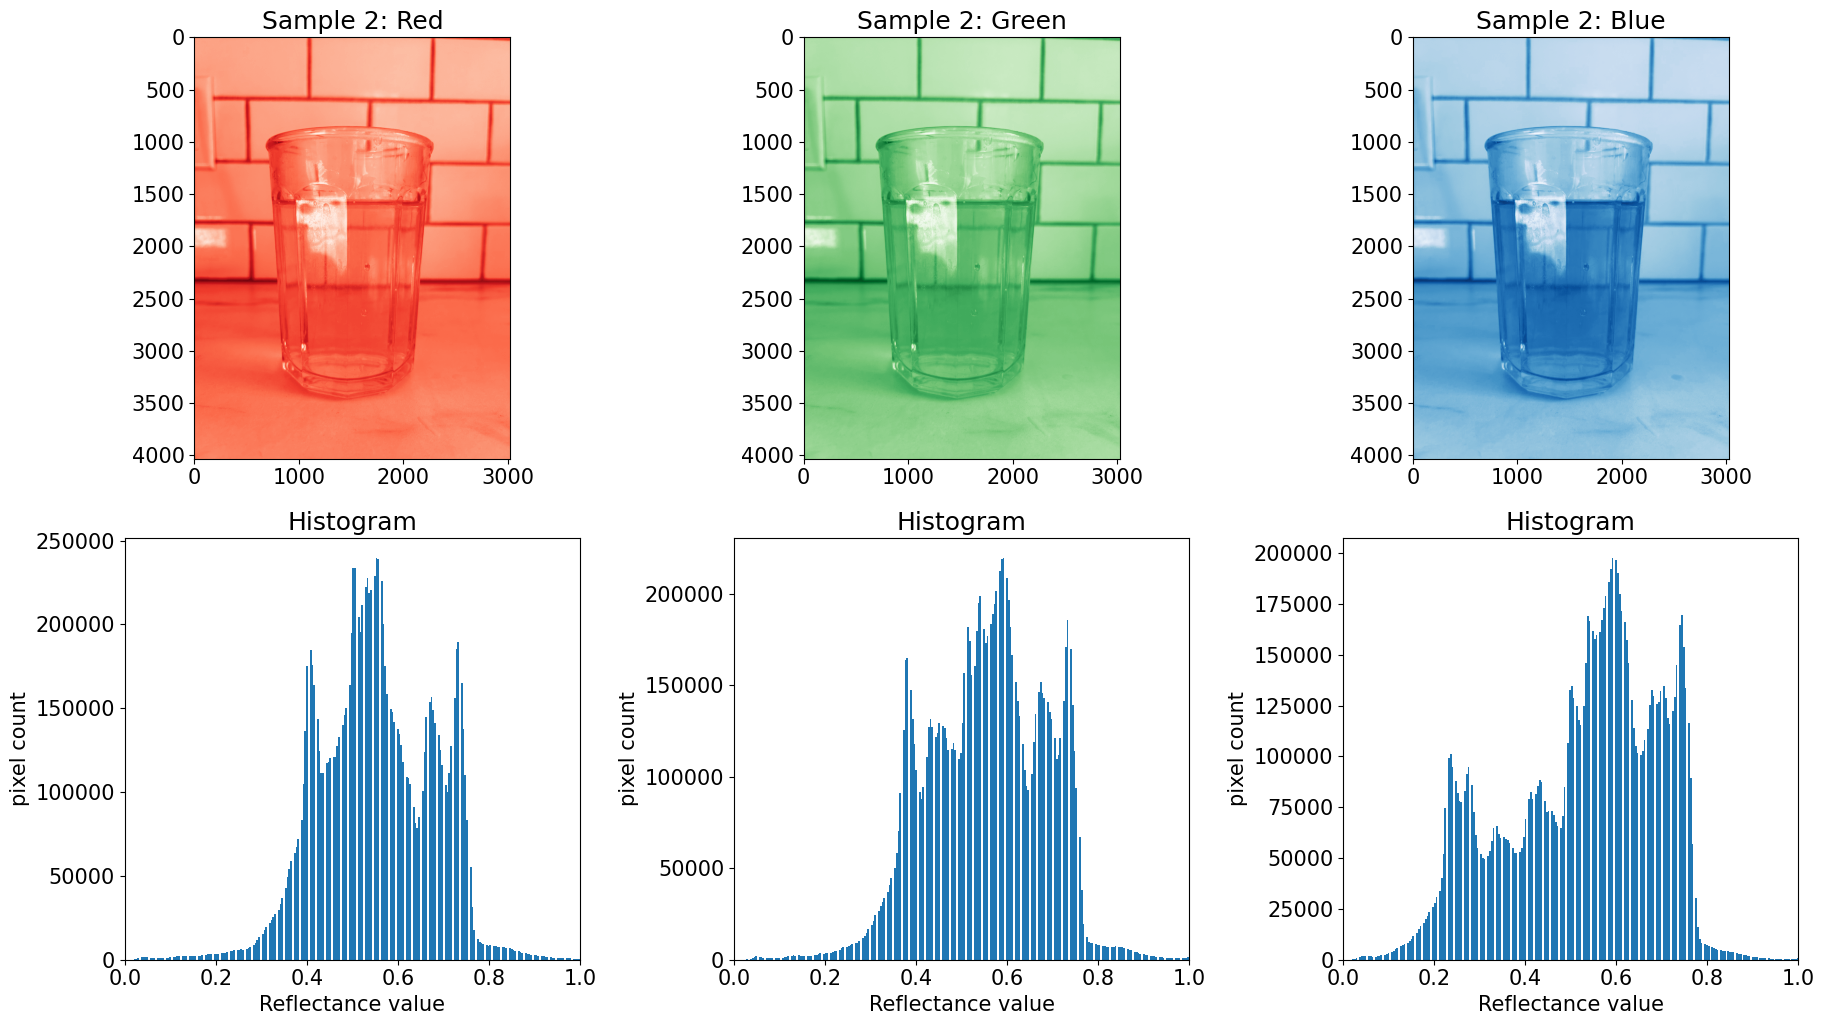

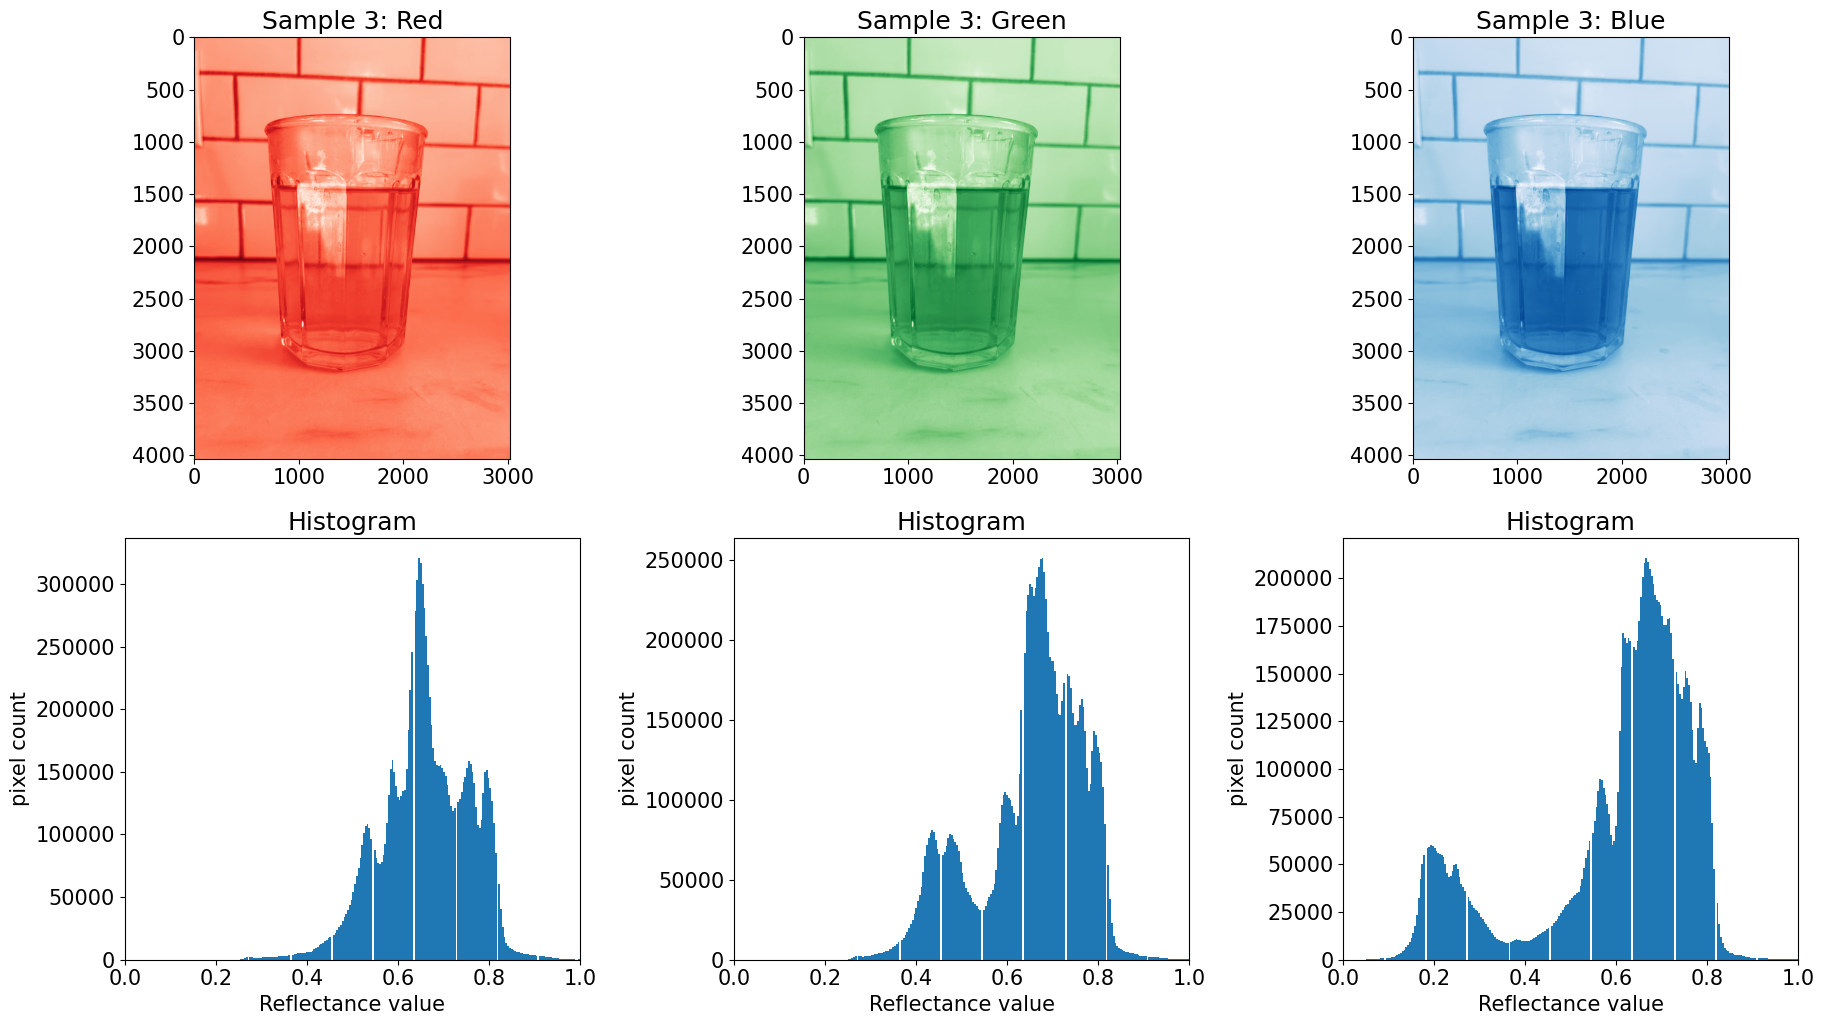

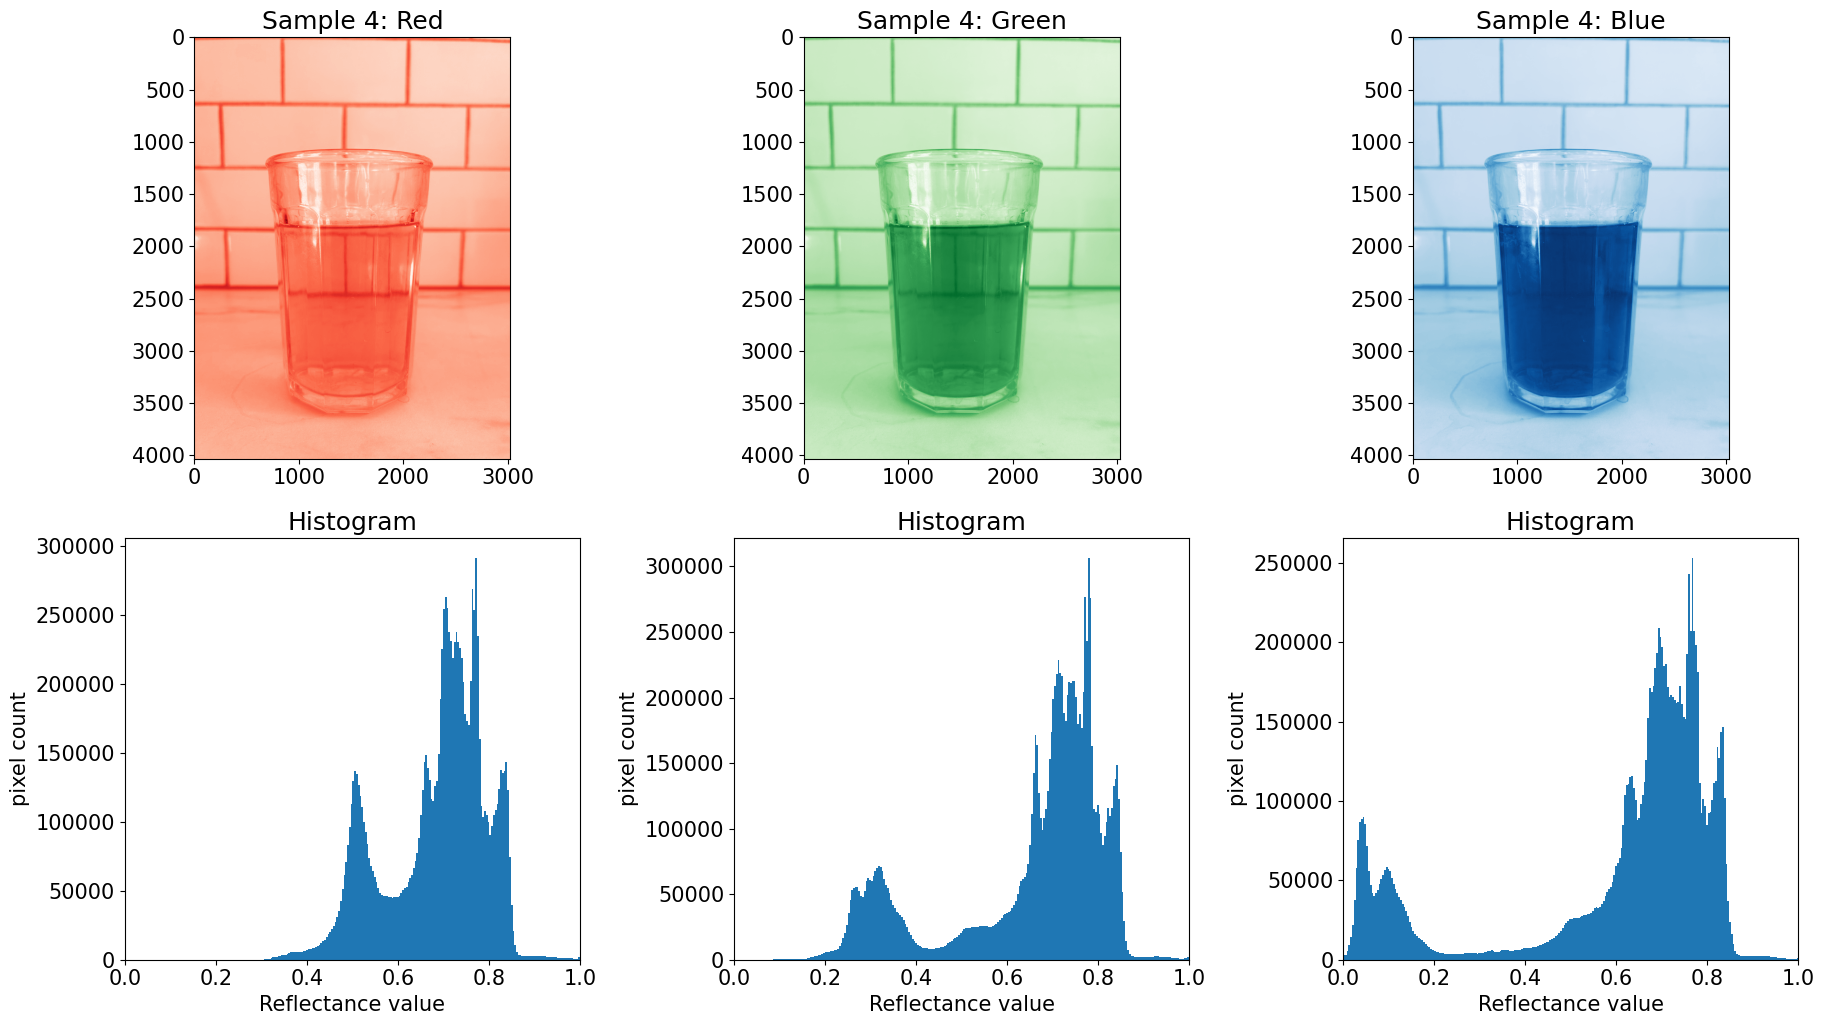

In [ ]:
plt.rcParams.update({'font.size': 15})

cols = ['Reds_r','Greens_r','Blues_r']
imgcollection = [img1,img2,img3,img4]
sampleLabels = ['Sample 1','Sample 2','Sample 3','Sample 4']
bandName = ['Red','Green','Blue']

for j, img in enumerate(imgcollection):
      # configure and draw the histogram figure
      fig, ax = plt.subplots(2,3)
      fig.set_size_inches(18.5, 10.5, forward=True)

      ax[0,0].imshow(img[:,:,0],cmap=cols[0])
      ax[0,0].set_title(sampleLabels[j] +": "+ bandName[0])
      ax[1,0].set_title("Histogram")
      ax[1,0].set_xlim([0.0, 1.0])
      ax[1,0].set_xlabel("Reflectance value")
      ax[1,0].set_ylabel("pixel count")
      ax[1,0].hist(img[:,:,0].flatten(), bins=256, range=(0, 1))

      ax[0,1].imshow(img[:,:,1],cmap=cols[1])
      ax[0,1].set_title(sampleLabels[j] +": "+ bandName[1])
      ax[1,1].set_title("Histogram")
      ax[1,1].set_xlim([0.0, 1.0])
      ax[1,1].set_xlabel("Reflectance value")
      ax[1,1].set_ylabel("pixel count")
      ax[1,1].hist(img[:,:,1].flatten(), bins=256, range=(0, 1))

      ax[0,2].imshow(img[:,:,2],cmap=cols[2])
      ax[0,2].set_title(sampleLabels[j] +": "+ bandName[2])
      ax[1,2].set_title("Histogram")
      ax[1,2].set_xlim([0.0, 1.0])
      ax[1,2].set_xlabel("Reflectance value")
      ax[1,2].set_ylabel("pixel count")
      ax[1,2].hist(img[:,:,2].flatten(), bins=256, range=(0, 1))

      fig.tight_layout()

**Part 2: Statistical modeling of chlorophyll-a**
---

Goal: Build a linear model that estimates the relationship between band reflectance and chlorophyll-a concentration.
---

---
**Instructions**
1. Input the chlorophyll-a data in the code below and run the section.


In [ ]:
import numpy as np
#Enter the Chlorophyll-a data
sample1 = 1 #Chlorophyll-a concentration in sample 1
sample2 = 2 #Chlorophyll-a concentration in sample 2
sample3 = 3 #Chlorophyll-a concentration in sample 3
sample4 = 4 #Chlorophyll-a concentration in sample 4

#Combine into one array
chla = np.array([sample1,sample2,sample3,sample4]).reshape(-1,1)

2. Run the code below to take the average reflectance value from each image and create three linear models using average reflectance value from each band (Red, Blue, Green) to predict chlorophyll-a.

Text(0.5, 1.0, 'Blue Band')

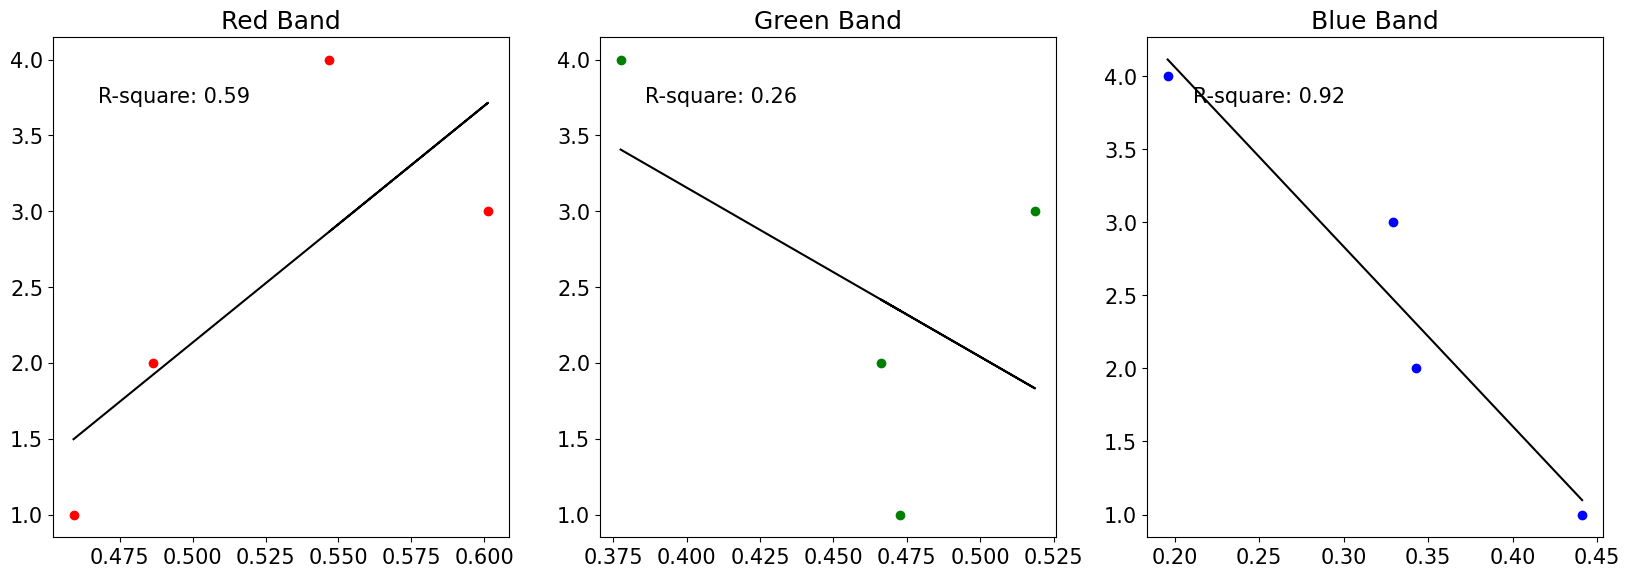

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#Crop images
#0 = Red, 1 = Green, 2 = Blue
img1c=img1[1500:3500,1000:2000,:]
img2c=img2[1500:3500,1000:2000,:]
img3c=img3[1250:3000,1000:2000,:]
img4c=img4[1500:3500,1000:2000,:]

img_means_r = np.array([np.mean(img1c[:,:,0]),np.mean(img2c[:,:,0]),np.mean(img3c[:,:,0]),np.mean(img4c[:,:,0])]).reshape(-1,1)
img_means_g = np.array([np.mean(img1c[:,:,1]),np.mean(img2c[:,:,1]),np.mean(img3c[:,:,1]),np.mean(img4c[:,:,1])]).reshape(-1,1)
img_means_b = np.array([np.mean(img1c[:,:,2]),np.mean(img2c[:,:,2]),np.mean(img3c[:,:,2]),np.mean(img4c[:,:,2])]).reshape(-1,1)



#Create Linear regressions
regr_r = linear_model.LinearRegression()
regr_r.fit(img_means_r, chla)
chla_r_p = regr_r.predict(img_means_r)

regr_g = linear_model.LinearRegression()
regr_g.fit(img_means_g, chla)
chla_g_p = regr_g.predict(img_means_g)

regr_b = linear_model.LinearRegression()
regr_b.fit(img_means_b, chla)
chla_b_p = regr_b.predict(img_means_b)


#Figure code
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20, 6.5, forward=True)
ax[0].scatter(img_means_r,chla, color="red")
ax[0].plot(img_means_r,chla_r_p,color="black")
ax[0].text(0.1, 0.9, "R-square: %.2f" % r2_score(chla,chla_r_p), ha='left', va='top',transform = ax[0].transAxes)
ax[0].set_title("Red Band")
ax[1].scatter(img_means_g,chla,color="green")
ax[1].plot(img_means_g,chla_g_p,color="black")
ax[1].text(0.1, 0.9, "R-square: %.2f" % r2_score(chla,chla_g_p), ha='left', va='top',transform = ax[1].transAxes)
ax[1].set_title("Green Band")
ax[2].scatter(img_means_b,chla, color="blue")
ax[2].plot(img_means_b,chla_b_p,color="black")
ax[2].text(0.1, 0.9, "R-square: %.2f" % r2_score(chla,chla_b_p), ha='left', va='top',transform = ax[2].transAxes)
ax[2].set_title("Blue Band")





---
*Questions*
1. Based on R-squared, which model best predicts chlorophyll-a?
2. Why do you think certain bands predict chlorophyll-a better than others?

Save the best model (regr r g or b) to the "model" object below

In [ ]:
model = regr_b

**Part 3: Model Application**
---

Goal: Apply the best chlorophyll-a model to an image of Lake Mendota.
---

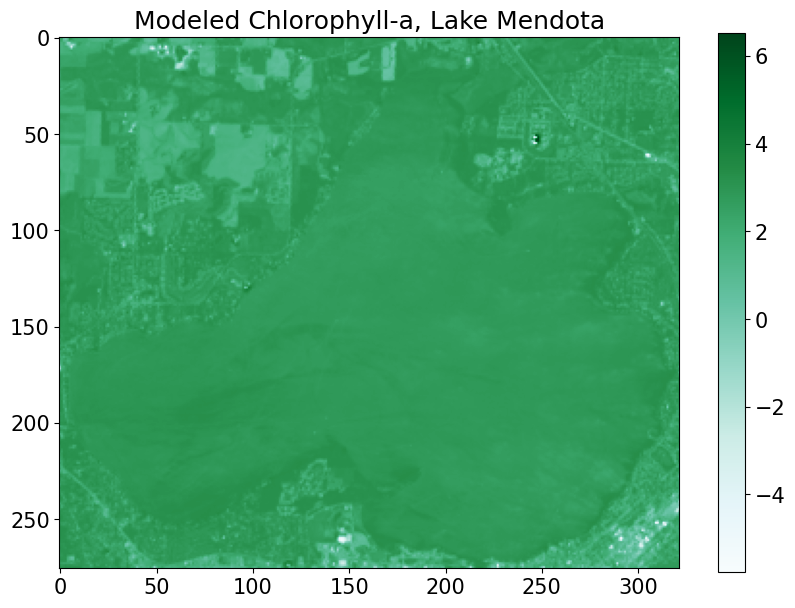

In [ ]:
import rasterio
from shapely.geometry import box
from fiona.crs import from_epsg
from rasterio.mask import mask
from rasterio.plot import show

src=rasterio.open('/content/imageToDriveExample.tif')


#Normalize and plot rgb image
out_img = src.read()

def norm(band):
    band_min, band_max = band.min(), band.max()
    return ((band - band_min)/(band_max - band_min))

r=norm(out_img[3])
g=norm(out_img[2])
b=norm(out_img[1])

rgb=np.dstack((r,g,b))
'''fig, ax = plt.subplots(figsize=(8,5))
plt.imshow(rgb)'''


#Take band corresponding to the model chosen above and model chlorophyll across the lake
mendota_chl = regr_b.predict(b.reshape(-1,1))
mendota_chl=mendota_chl.reshape(b.shape)

fig, ax = plt.subplots(figsize=(10,7))
model_plot=plt.imshow(mendota_chl,cmap='BuGn')
plt.title("Modeled Chlorophyll-a, Lake Mendota")
fig.colorbar(model_plot, ax=ax, location='right')


---
*Questions*
1. Which areas of Lake Mendota appear to have the highest chlorophyll-a?
2. Do you think the model worked well? What are some limitations of this approach to estimating chlorophyll-a?